In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.stats import ttest_ind
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

pgs_user = 'dsbc_student'
pgs_pw = '7*.8G9QH21'
pgs_host = '142.93.121.174'
pgs_port = '5432'
pgs_db = 'studentsperformance'

engine=create_engine('postgresql://{}:{}@{}:{}/{}'.format(pgs_user,pgs_pw,pgs_host,pgs_port, pgs_db))

student_df = pd.read_sql_query('select * from studentsperformance', con=engine)
engine.dispose()

student_df.info()
student_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# 1. Are there any differences between the genders, ethnicities, and parental level of education with respect to student performances in exams?

In [2]:
student_df.groupby("gender").mean()

,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [3]:
student_df.groupby("race/ethnicity").mean()

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [4]:
student_df.groupby("parental level of education").mean()

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


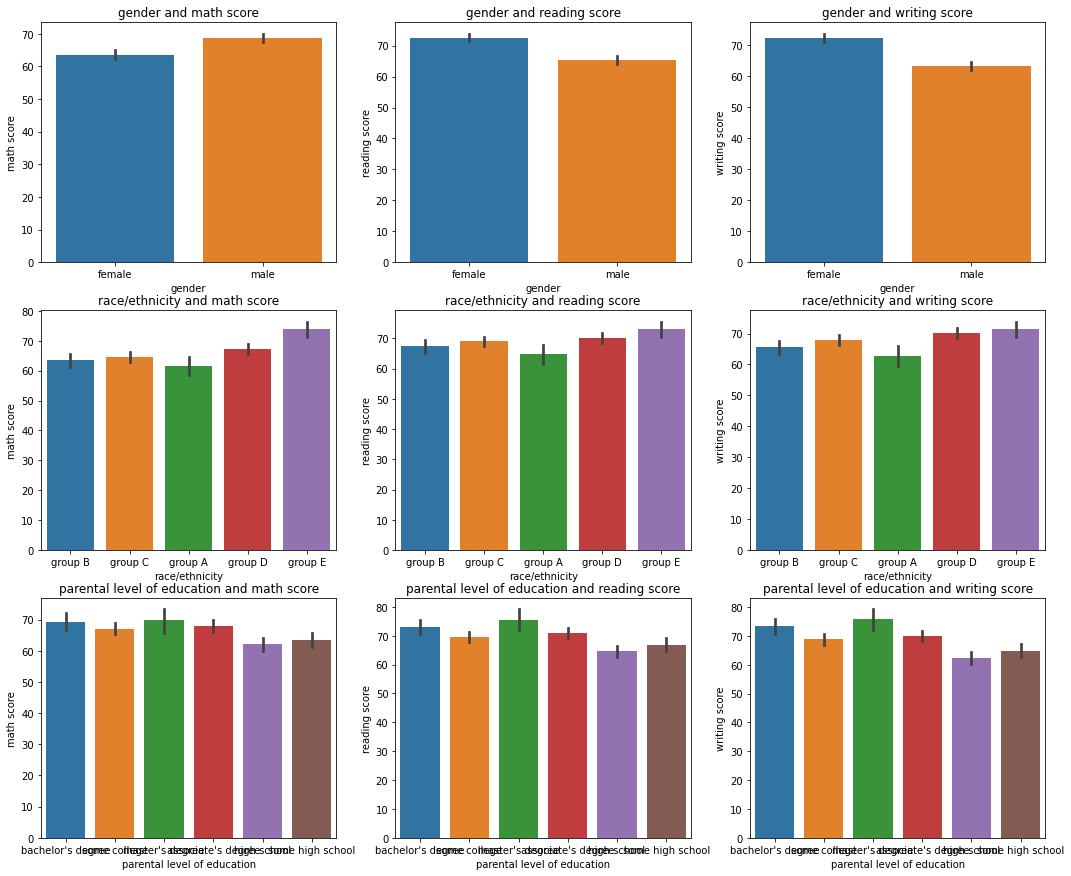

In [5]:
plt.figure(figsize=(18, 15))

plt.subplot(3,3,1)
sns.barplot(student_df["gender"], student_df["math score"])
plt.title("gender and math score")

plt.subplot(3,3,2)
sns.barplot(student_df["gender"], student_df["reading score"])
plt.title("gender and reading score")

plt.subplot(3,3,3)
sns.barplot(student_df["gender"], student_df["writing score"])
plt.title("gender and writing score")

plt.subplot(3,3,4)
sns.barplot(student_df["race/ethnicity"], student_df["math score"])
plt.title("race/ethnicity and math score")

plt.subplot(3,3,5)
sns.barplot(student_df["race/ethnicity"], student_df["reading score"])
plt.title("race/ethnicity and reading score")

plt.subplot(3,3,6)
sns.barplot(student_df["race/ethnicity"], student_df["writing score"])
plt.title("race/ethnicity and writing score")

plt.subplot(3,3,7)
sns.barplot(student_df["parental level of education"], student_df["math score"])
plt.title("parental level of education and math score")

plt.subplot(3,3,8)
sns.barplot(student_df["parental level of education"], student_df["reading score"])
plt.title("parental level of education and reading score")

plt.subplot(3,3,9)
sns.barplot(student_df["parental level of education"], student_df["writing score"])
plt.title("parental level of education and writing score")

plt.show()

In [6]:
genders=student_df["gender"].unique()
gender_grouped = student_df.groupby("gender")
for var in ["math score", "reading score", "writing score"]:
    print("-----------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("-----------------------------------------------")
    for i in range(0,len(genders)):
        for j in range(i+1, len(genders)):
            print("t-test between groups {0} and {1}:".format(genders[i], genders[j]))
            print(stats.ttest_ind(student_df[student_df["gender"]==genders[i]][var],
                                 student_df[student_df["gender"]==genders[j]][var]))
            
races=student_df["race/ethnicity"].unique()
race_grouped = student_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
    print("-----------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("-----------------------------------------------")
    for i in range(0,len(races)):
        for j in range(i+1, len(races)):
            print("t-test between groups {0} and {1}:".format(races[i], races[j]))
            print(stats.ttest_ind(student_df[student_df["race/ethnicity"]==races[i]][var],
                                 student_df[student_df["race/ethnicity"]==races[j]][var]))

parents=student_df["parental level of education"].unique()
parents_grouped = student_df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
    print("-----------------------------------------------")
    print("Comparisons for variable: {}".format(var))
    print("-----------------------------------------------")
    for i in range(0,len(parents)):
        for j in range(i+1, len(parents)):
            print("t-test between groups {0} and {1}:".format(parents[i], parents[j]))
            print(stats.ttest_ind(student_df[student_df["parental level of education"]==parents[i]][var],
                                 student_df[student_df["parental level of education"]==parents[j]][var]))
  

-----------------------------------------------
Comparisons for variable: math score
-----------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=-5.383245869828983, pvalue=9.120185549328822e-08)
-----------------------------------------------
Comparisons for variable: reading score
-----------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=7.959308005187657, pvalue=4.680538743933289e-15)
-----------------------------------------------
Comparisons for variable: writing score
-----------------------------------------------
t-test between groups female and male:
Ttest_indResult(statistic=9.979557910004507, pvalue=2.019877706867934e-22)
-----------------------------------------------
Comparisons for variable: math score
-----------------------------------------------
t-test between groups group B and group C:
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-

## Some seem to have correlation based on the t-test, and some don't. 

# 2. Are there any differences between the lunch types with respect to student performances in exams? If there are, how do you explain this?

In [7]:
student_df.groupby("lunch").mean()

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


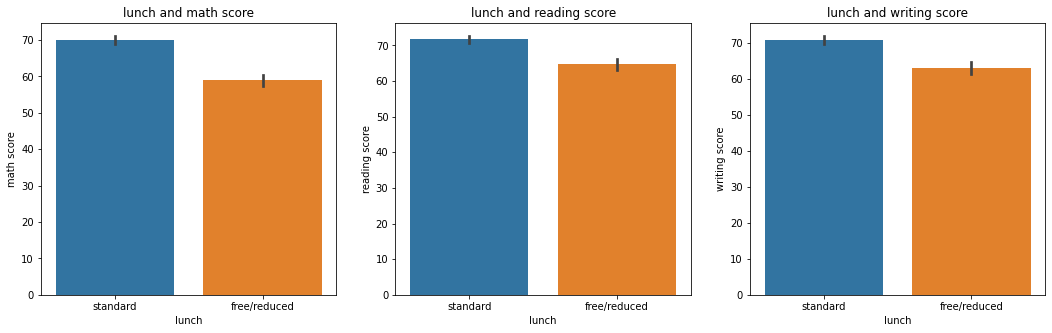

In [8]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df["lunch"], student_df["math score"])
plt.title("lunch and math score")

plt.subplot(1,3,2)
sns.barplot(student_df["lunch"], student_df["reading score"])
plt.title("lunch and reading score")

plt.subplot(1,3,3)
sns.barplot(student_df["lunch"], student_df["writing score"])
plt.title("lunch and writing score")

plt.show()

In [9]:
ttest_ind(student_df[student_df.lunch == "free/reduced"][["math score", "reading score", "writing score"]], student_df[student_df.lunch == "standard"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

## Individuals with standard lunch types seem to have higher score than individuals with free/reduced lunch types.

# 3. Does the test preparation course seem to have an effect on the exam performances?

In [10]:
student_df.groupby("test preparation course").mean()

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


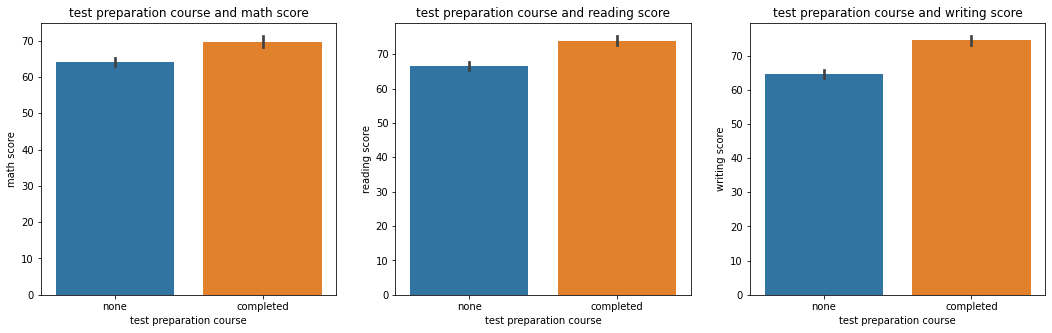

In [11]:
plt.figure(figsize=(18,5))

plt.subplot(1,3,1)
sns.barplot(student_df["test preparation course"], student_df["math score"])
plt.title("test preparation course and math score")

plt.subplot(1,3,2)
sns.barplot(student_df["test preparation course"], student_df["reading score"])
plt.title("test preparation course and reading score")

plt.subplot(1,3,3)
sns.barplot(student_df["test preparation course"], student_df["writing score"])
plt.title("test preparation course and writing score")

plt.show()

In [12]:
ttest_ind(student_df[student_df["test preparation course"] == "none"][["math score", "reading score", "writing score"]], student_df[student_df["test preparation course"] == "completed"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ -5.70461642,  -7.87166354, -10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

## Individuals who completed the test preparation course had higher scores.

# 4. Which two exam scores are most correlated with each other?

In [13]:
student_df[["math score", "reading score", "writing score"]].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


## Reading and writing are the most correlated.